In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset that includes air quality, weather, and traffic data
file_path = "/content/merged_air_weather_traffic.csv"
df = pd.read_csv(file_path)

# Display basic info and head of the dataset to understand structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13056 entries, 0 to 13055
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      13056 non-null  object 
 1   Date                      13056 non-null  object 
 2   PM2.5                     13056 non-null  float64
 3   PM10                      13056 non-null  float64
 4   SO2                       13056 non-null  float64
 5   NO2                       13056 non-null  float64
 6   CO                        13056 non-null  float64
 7   O3                        13056 non-null  float64
 8   NH3                       13056 non-null  float64
 9   Computed_AQI              13056 non-null  float64
 10  Computed_AQI_Bucket       11878 non-null  object 
 11  Year                      13056 non-null  int64  
 12  Month                     13056 non-null  int64  
 13  Season                    13056 non-null  object 
 14  Max_te

In [2]:
df.head()

,City,Date,PM2.5,PM10,SO2,NO2,CO,O3,NH3,Computed_AQI,...,Max_wind_speed,Avg_wind_speed,Min_wind_speed,Max_pressure,Avg_pressure,Min_pressure,Max_precipitation,DayOfWeek,Traffic_Congestion_Index,Simulated_Traffic_Index
0,indore,2019-09-17,41.88,129.71,11.51,49.19,1.80,29.98,5.54,120.075772,...,8.0,6.3,3.0,27.9,27.8,27.8,0.04,1,18.6,18.574152
1,indore,2019-09-18,27.35,72.86,8.10,43.93,1.34,30.19,12.78,72.860000,...,23.0,8.1,3.0,28.0,27.9,27.8,0.55,2,18.6,18.689463
2,indore,2019-09-19,16.62,41.76,5.72,36.22,1.25,26.24,25.00,59.166667,...,14.0,7.3,3.0,27.9,27.9,27.8,0.87,3,18.6,18.584483
3,indore,2019-09-20,12.84,35.59,4.09,31.66,0.74,19.82,17.56,39.575000,...,18.0,9.1,3.0,27.9,27.9,27.8,0.16,4,18.6,18.586528
4,indore,2019-09-21,10.83,44.55,6.02,32.99,0.76,19.95,13.64,44.550000,...,9.0,4.6,0.0,27.9,27.8,27.8,0.31,5,18.6,15.813559


In [3]:
df.shape

(13056, 33)


Missing Values:

City                           0
Date                           0
PM2.5                          0
PM10                           0
SO2                            0
NO2                            0
CO                             0
O3                             0
NH3                            0
Computed_AQI                   0
Computed_AQI_Bucket         1178
Year                           0
Month                          0
Season                         0
Max_temp                       0
Avg_temp                       0
Min_temp                       0
Max_dewpoint                   0
Avg_dewpoint                   0
Min_dewpoint                   0
Max_humidity_per               0
Avg_humidity_per               0
Min_humidity_per               0
Max_wind_speed                 0
Avg_wind_speed                 0
Min_wind_speed                 0
Max_pressure                   0
Avg_pressure                   0
Min_pressure                   0
Max_precipitation        

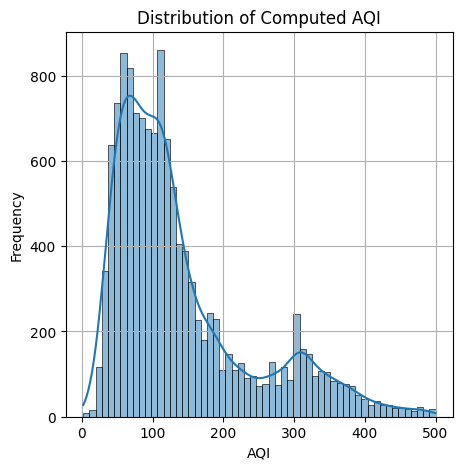

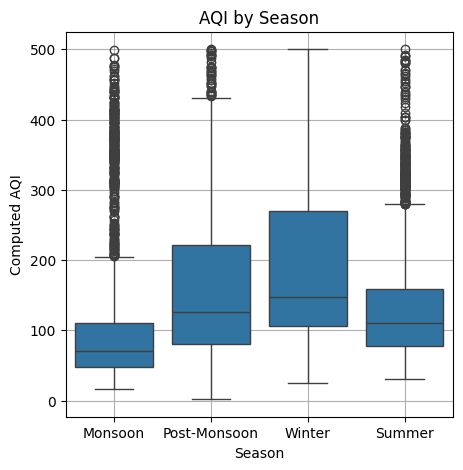

In [4]:
#EDA
print("\nMissing Values:\n")
print(df.isnull().sum())

print("\nStatistical Summary:\n")
print(df.describe())

# AQI Distribution
plt.figure(figsize=(5,5))
sns.histplot(df['Computed_AQI'], kde=True)
plt.title('Distribution of Computed AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot of AQI
plt.figure(figsize=(5,5))
sns.boxplot(x='Season', y='Computed_AQI', data=df)
plt.title('AQI by Season')
plt.xlabel('Season')
plt.ylabel('Computed AQI')
plt.grid(True)
plt.show()



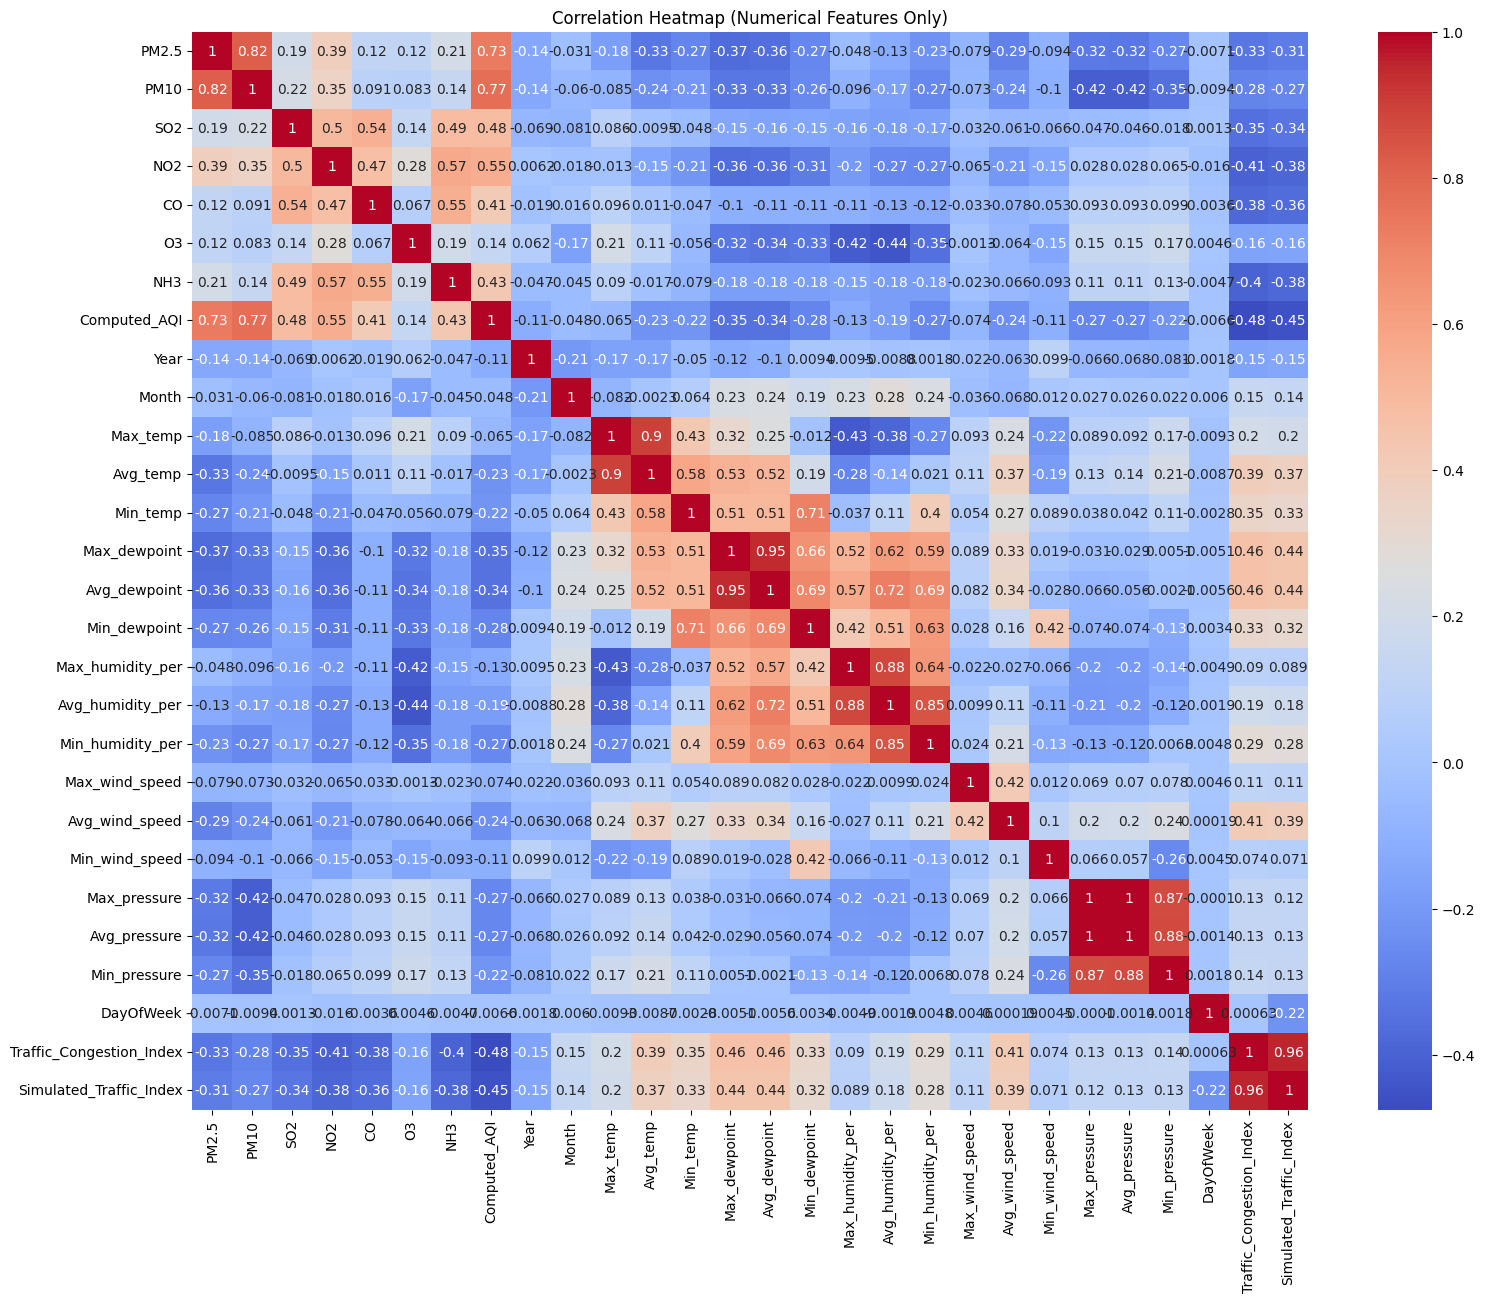

In [5]:
# Correlation heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(18,14))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()

# Trying randomforest classifier

Model and Scaler saved successfully!

Classification Report:

              precision    recall  f1-score   support

        Good       0.90      0.64      0.75       173
    Moderate       0.85      0.88      0.87       833
        Poor       0.75      0.62      0.68       208
Satisfactory       0.85      0.90      0.87       887
      Severe       0.89      0.86      0.88       146
   Very Poor       0.72      0.75      0.73       129

    accuracy                           0.84      2376
   macro avg       0.83      0.78      0.80      2376
weighted avg       0.84      0.84      0.84      2376



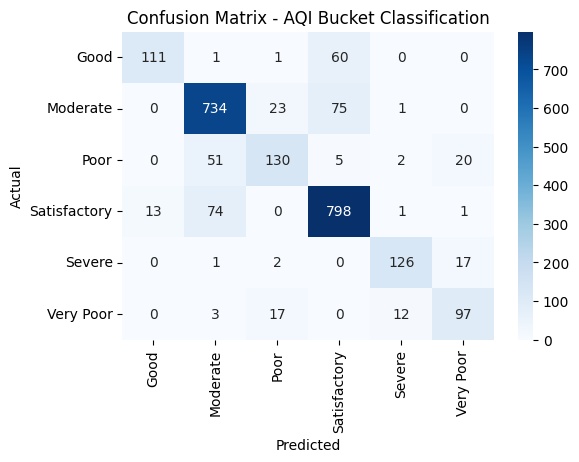


Overall Accuracy: 84.01%


In [6]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df_class = df.drop(columns=['City', 'Date'])
df_class['Max_precipitation'] = pd.to_numeric(df_class['Max_precipitation'], errors='coerce')
# One-hot encoding season
df_class = pd.get_dummies(df_class, columns=['Season'], drop_first=True)
df_class = df_class.dropna(subset=['Computed_AQI_Bucket'])

# mean imputation
numeric_cols = df_class.select_dtypes(include=[np.number]).columns
df_class[numeric_cols] = df_class[numeric_cols].fillna(df_class[numeric_cols].mean())

X_class = df_class.drop(columns=['Computed_AQI', 'Computed_AQI_Bucket'])  # Features
y_class = df_class['Computed_AQI_Bucket']                                 # Target bucket (class)

le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class_encoded, test_size=0.2, random_state=42)

scaler_c = StandardScaler()
X_train_scaled_c = scaler_c.fit_transform(X_train_c)
X_test_scaled_c = scaler_c.transform(X_test_c)

model_c = RandomForestClassifier(n_estimators=100, random_state=42)
model_c.fit(X_train_scaled_c, y_train_c)

#save model
joblib.dump(model_c, 'aqi_classifier_model.pkl')
joblib.dump(scaler_c, 'scaler_classifier.pkl')
print("Model and Scaler saved successfully!")

y_pred_c = model_c.predict(X_test_scaled_c)


print("\nClassification Report:\n")
print(classification_report(y_test_c, y_pred_c, target_names=le.classes_))


cm = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AQI Bucket Classification')
plt.show()

acc = accuracy_score(y_test_c, y_pred_c)
print(f"\nOverall Accuracy: {acc*100:.2f}%")
